In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import bokeh
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('kdrama.csv')

In [ ]:
df

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"[Jun Ji-hyun, Lee Min-ho]",17.600,"[Fantasy, Romance, Comedy]","[Jin Hyuk, Park Seon-Ho]",[Park Ji-eun],2016,21,SBS
1,The Heirs,7.5,"[Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park ...",16.700,"[Romance, Drama, Teen]","[Kang Shin-hyo, Boo Sung-chul]",[Kim Eun-sook],2013,20,SBS
2,The King: Eternal Monarch,8.3,"[Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyun...",7.700,"[Romance, Fantasy, Drama]","[Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won]",[Kim Eun-sook],2020,16,SBS
3,Boys over Flowers,7.9,"[Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim B...",25.700,"[Romance, Comedy, Drama]",[Jeon Ki-sang],[Yoon Ji-ryun],2009,25,KBS
4,Guardian: the lonely and the great god,8.6,"[Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-n...",12.810,"[Fantasy, Romance, Drama]","[Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho]",[Kim Eun-sook],2016,18,TvN
...,...,...,...,...,...,...,...,...,...,...
187,Big Mouth,8.0,"[Lee Jong-suk, Im Yoon-ah, Kim Joo-hun ]",10.000,"[Legal, Crime ]","[Oh Chung-hwan, Bae Hyun-jin ]",[Kim Ho-jun ],2022,16,MBC
188,Good job,7.7,"[Jung Il-woo, Kwon Yu-ri ]",2.500,"[Mystery, Fantasy, Romance ]","[Kang Min-gu, Kim Seong-jin ]","[Kim Jeong-ae, Kwon Hee-kyung ]",2022,12,ENA
189,If you wish upon me,8.3,"[Ji Chang-wook, Sung Dong-il, Choi Soo-young ]",2.300,"[Slice-of-life, Drama]",[Kim Yong-wan],[Jo Ryeong-soo ],2022,16,KBS
190,100 days my prince,7.7,"[Doh Kyung-soo, Nam Ji-hyun, Jo Sung-ha, Jo Ha...",9.010,"[Historical, Romance, Comedy ]","[Lee Jong-jae, Nam Sung-woo]",[No Ji-sul ],2018,16,TvN


In [ ]:
def formatting(lst):
    for col in lst:
        for i in range(df.shape[0]):
            df[col][i] = df[col][i].split(',')

        for i in range(df.shape[0]):
            for j in range(len(df[col][i])):
                df[col][i][j] = df[col][i][j].lstrip()
        
    

In [ ]:
format_col = ['Actors','Genre','Director','Writer']

In [ ]:
formatting(format_col)

Genre List

In [ ]:
g_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Genre'][i])):
        g_list.append(df['Genre'][i][j])
Genre_list = list(set(g_list))

Network List

In [ ]:
Network_list = df['Network'].unique().tolist()

Actors List

In [ ]:
a_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Actors'][i])):
        a_list.append(df['Actors'][i][j])
Actors_list = list(set(a_list))

Directors List

In [ ]:
d_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Director'][i])):
        d_list.append(df['Director'][i][j])
Directors_list = list(set(d_list))


Writers List

In [ ]:
w_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Writer'][i])):
        w_list.append(df['Writer'][i][j])
Writers_list = list(set(w_list))


Drama List

In [ ]:
dr_list = []
for i in range(df.shape[0]):
    dr_list.append(df['Drama Name'][i])
Drama_List = dr_list


### Networking Companies

In [ ]:
network = df.copy()

In [ ]:
a = network.groupby(by="Network").sum()

Text(0, 0.5, 'Popularity')

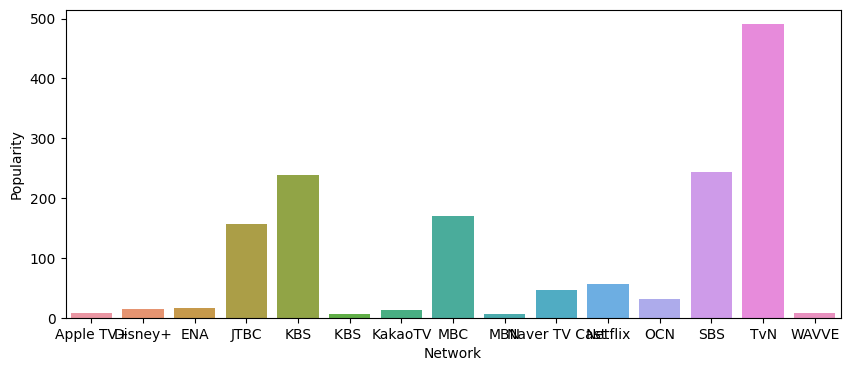

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=a.index,y='Rating(Out of 10)',data=a)
plt.ylabel("Popularity")

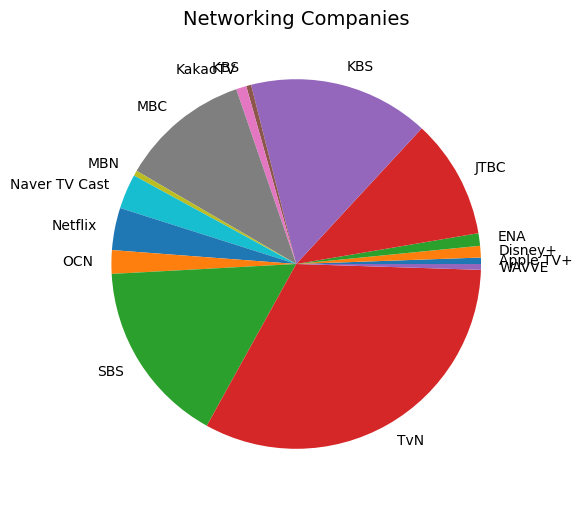

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = a.index.tolist()
plt.pie(x=a['Rating(Out of 10)'].tolist(), labels=labels, pctdistance=0.5)
plt.title("Networking Companies", fontsize=14);


In [ ]:
d = dict()

In [ ]:
def genre_dictionary(com_list):
    dictionary_list = []
    for c in com_list:
        a = network.loc[:,('Genre','Network')]
        b = a[a['Network'] == c]
        d = dict((g,0) for g in Genre_list)
        for i in (b.index.to_list()):
            for j in range(len(b['Genre'][i])):
                for k in Genre_list:
                    if b['Genre'][i][j] == k:
                        d[k] +=1
        dictionary_list.append(d)
        
    return dictionary_list

    
    
    

In [ ]:
dic = genre_dictionary(Network_list)

In [ ]:
for i,j in zip(Network_list,dic):
    d[i] = j

In [ ]:
netdata = pd.DataFrame.from_dict(d, orient ='index') 


In [ ]:
#Piechart
def network_piechart(nw):
    d = netdata[netdata.index == str(nw)]
    plt.figure(figsize=(9,9))
    net_list = []
    for i in range(1):
        for j in range(d.shape[1]):
            if d.iloc[i,j] == 0:
                pass
            else:
                net_list.append(d.columns[j])
    Genre = net_list


    Value = list(filter(lambda a: a != 0,d.iloc[0,:].tolist()))


    # Pie Chart
    plt.pie(Value, labels=Genre,
            autopct='%1.1f%%', pctdistance=0.9)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Adding Title of chart
    plt.title(nw)

    # Displaing Chart
    plt.show()

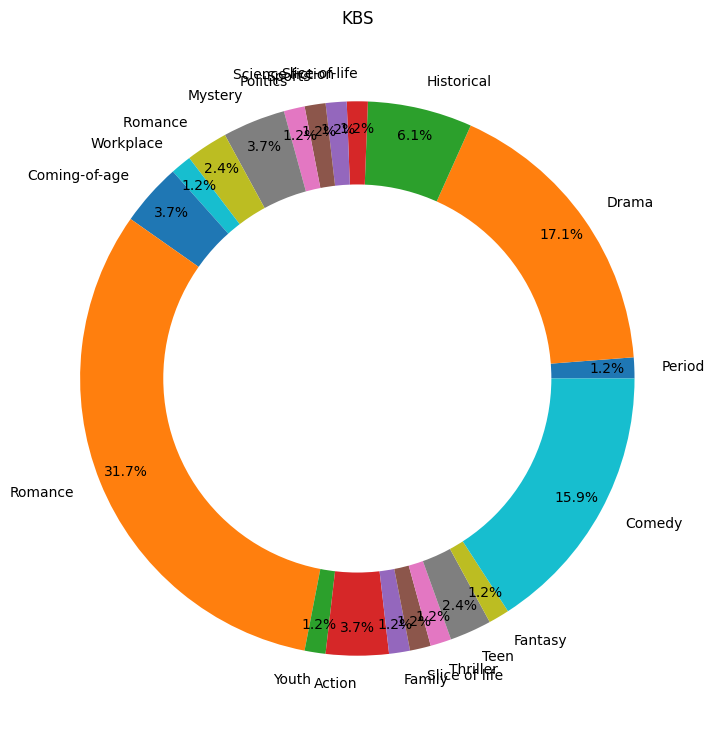

In [ ]:
network_piechart('KBS')

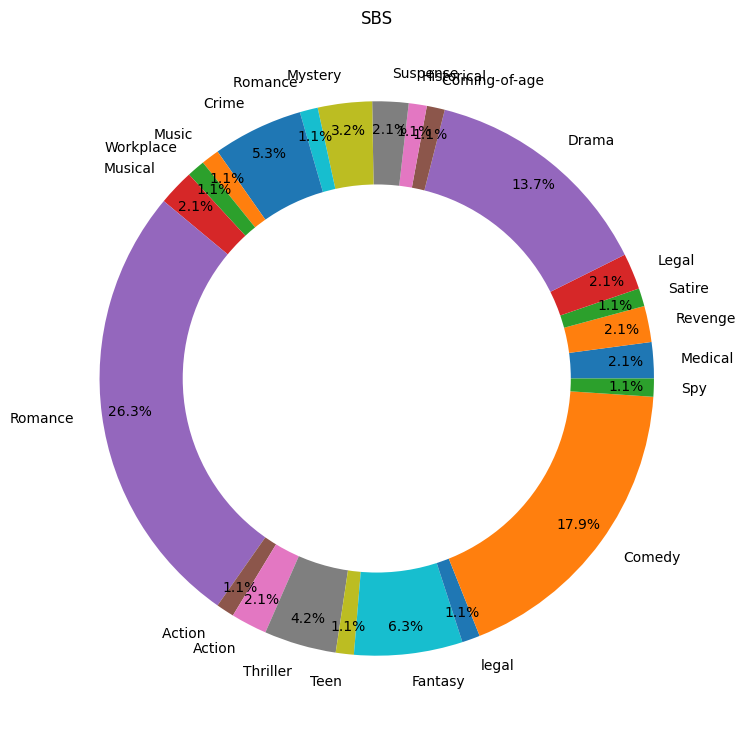

In [ ]:
network_piechart('SBS')

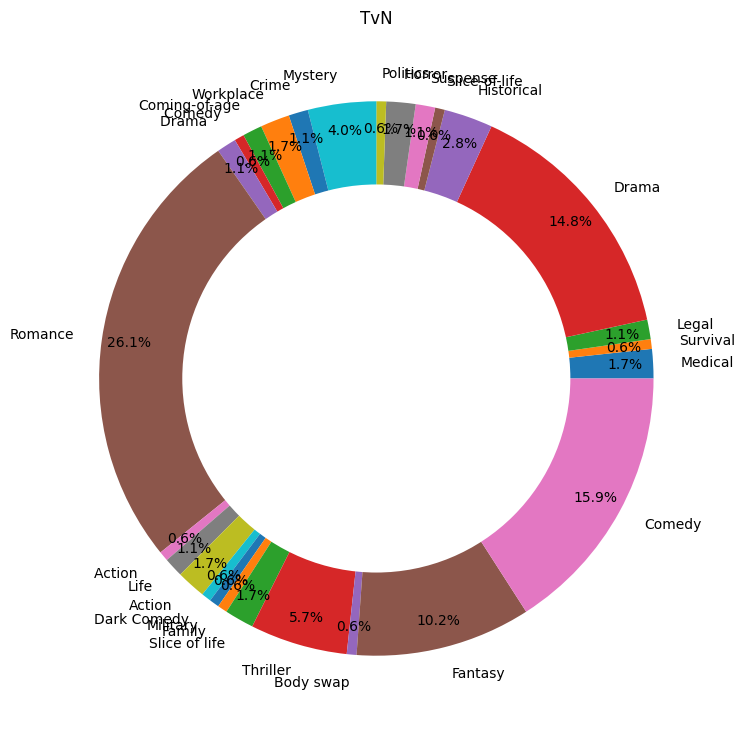

In [ ]:
network_piechart('TvN')

## Actors

In [ ]:
actors = df.copy()
actors

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"[Jun Ji-hyun, Lee Min-ho]",17.600,"[Fantasy, Romance, Comedy]","[Jin Hyuk, Park Seon-Ho]",[Park Ji-eun],2016,21,SBS
1,The Heirs,7.5,"[Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park ...",16.700,"[Romance, Drama, Teen]","[Kang Shin-hyo, Boo Sung-chul]",[Kim Eun-sook],2013,20,SBS
2,The King: Eternal Monarch,8.3,"[Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyun...",7.700,"[Romance, Fantasy, Drama]","[Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won]",[Kim Eun-sook],2020,16,SBS
3,Boys over Flowers,7.9,"[Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim B...",25.700,"[Romance, Comedy, Drama]",[Jeon Ki-sang],[Yoon Ji-ryun],2009,25,KBS
4,Guardian: the lonely and the great god,8.6,"[Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-n...",12.810,"[Fantasy, Romance, Drama]","[Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho]",[Kim Eun-sook],2016,18,TvN
...,...,...,...,...,...,...,...,...,...,...
187,Big Mouth,8.0,"[Lee Jong-suk, Im Yoon-ah, Kim Joo-hun ]",10.000,"[Legal, Crime ]","[Oh Chung-hwan, Bae Hyun-jin ]",[Kim Ho-jun ],2022,16,MBC
188,Good job,7.7,"[Jung Il-woo, Kwon Yu-ri ]",2.500,"[Mystery, Fantasy, Romance ]","[Kang Min-gu, Kim Seong-jin ]","[Kim Jeong-ae, Kwon Hee-kyung ]",2022,12,ENA
189,If you wish upon me,8.3,"[Ji Chang-wook, Sung Dong-il, Choi Soo-young ]",2.300,"[Slice-of-life, Drama]",[Kim Yong-wan],[Jo Ryeong-soo ],2022,16,KBS
190,100 days my prince,7.7,"[Doh Kyung-soo, Nam Ji-hyun, Jo Sung-ha, Jo Ha...",9.010,"[Historical, Romance, Comedy ]","[Lee Jong-jae, Nam Sung-woo]",[No Ji-sul ],2018,16,TvN


In [ ]:
A = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network','Viewship Rate')]

In [ ]:
drama_list = []
for c in Drama_List:
    a = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network')]
    b = a[a['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)
        


In [ ]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j


<Axes: ylabel='Rating(Out of 10)'>

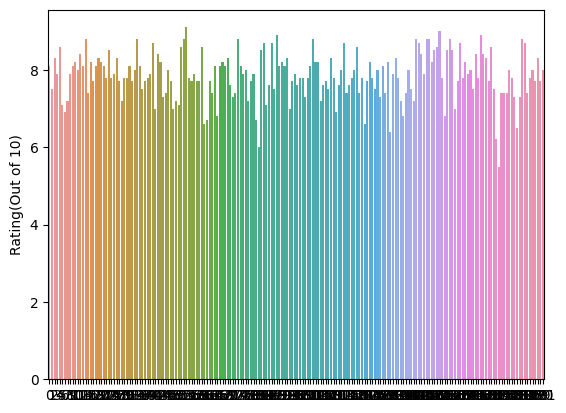

In [ ]:
sns.barplot(x=a.index,y='Rating(Out of 10)',data=a)


<Axes: ylabel='Rating(Out of 10)'>

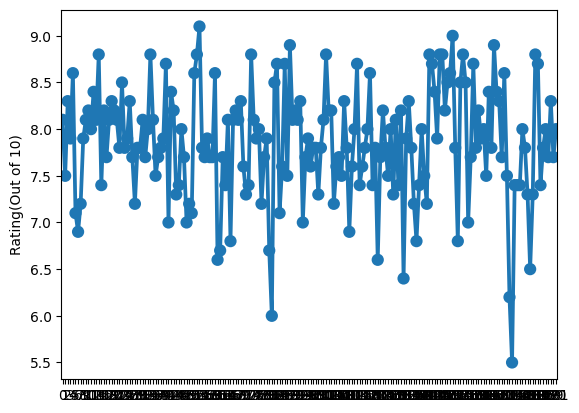

In [ ]:
sns.pointplot(x=a.index, y='Rating(Out of 10)', data=a)


<Axes: >

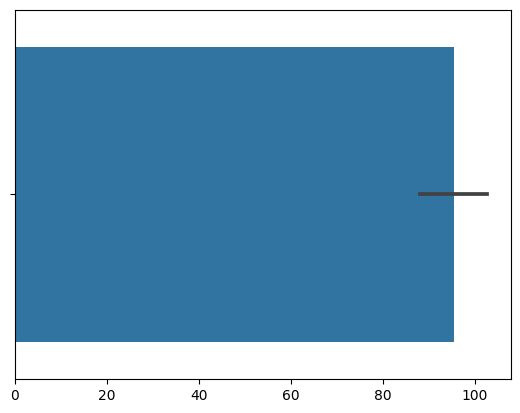

In [ ]:
sns.barplot(x=a.index, data=a)


Enter the actor name:Park Hyung-sik
The Heirs
Strong Woman: Do Bong soo
Hwarang
Happiness
Soundtrack #1


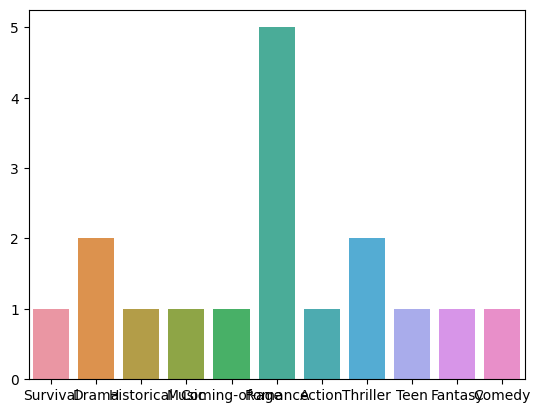

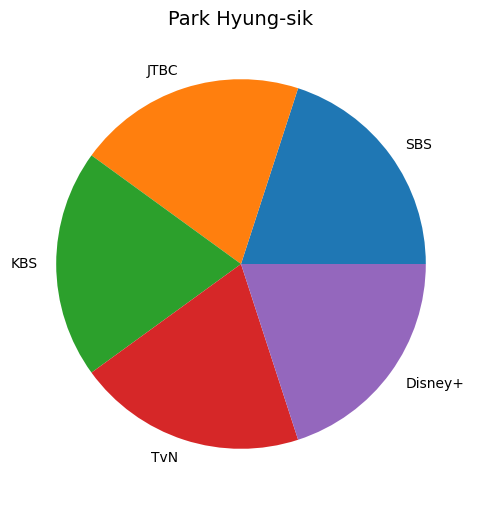

In [ ]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
actordata = pd.merge(A,dramadata,on='Drama Name')
actdata = pd.DataFrame(columns = actordata.columns.tolist())
index_ = []
user = input("Enter the actor name:")
for i in range(actordata.shape[0]):
    if user in actordata['Actors'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
        print(actordata['Drama Name'][i])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,6:]

for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
#sns.barplot(z.columns.tolist(),z.sum())
sns.barplot(x=z.columns.tolist(), y=z.sum())

pie, ax = plt.subplots(figsize=[10,6])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
plt.title(user, fontsize=14);


TOP 5 Popular Actors/Actress


In [ ]:
result

,Drama Name,Rating(Out of 10),Actors,Genre,Network,Viewship Rate,Period,Medical,Revenge,Satire,...,Family,Slice of life,Thriller,Teen,Body swap,Fantasy,legal,Comedy,Crime,Spy
1,The Heirs,7.5,"[Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park ...","[Romance, Drama, Teen]",SBS,16.7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,Strong Woman: Do Bong soo,8.2,"[Park Bo-young, Park Hyung-sik, Ji soo]","[Fantasy, Thriller, Action, Romance, Comedy]",JTBC,7.6,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
127,Hwarang,8.0,"[Park Seo-joon, Go A-ra, Park Hyung-sik, Choi ...","[Historical, Coming-of-age, Romance]",KBS,7.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,Happiness,8.3,"[Han Hyo-joo, Park Hyung-sik, Jo Woo-jin]","[Thriller, Romance, Survival, Drama]",TvN,3.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
162,Soundtrack #1,7.9,"[Park Hyung-sik, Han So-hee]","[Romance, Music]",Disney+,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
index_ = []
act_ = []
for i in range(actordata.shape[0]):
    for j in Actors_list:
        if j in actordata['Actors'][i]:
            act_.append(j)
            index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
result['Actor Name'] = act_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Actors','Network'],axis=1)
result.groupby('Actor Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)


,Rating(Out of 10),Viewship Rate
Actor Name,,
Park Gyu-young,56.9,37.40
Park Shin-hye,53.1,73.58
Park Seo-joon,48.4,58.27
Nam Joo-hyuk,48.2,35.69
Ji Chang-wook,47.3,31.06


## Drama

In [ ]:
Drama = df.copy()

In [ ]:
Drama = Drama.drop(['Actors','Director','Writer','Network'],axis=1)

In [ ]:
drama_list = []
for c in Drama_List:
    b = Drama[Drama['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)
        

In [ ]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [ ]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Drama = pd.merge(Drama,dramadata,on='Drama Name')
Drama = Drama.drop(['Genre'],axis=1)

In [ ]:
Drama

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes,Period,Medical,Revenge,Satire,Survival,...,Family,Slice of life,Thriller,Teen,Body swap,Fantasy,legal,Comedy,Crime,Spy
0,Legend of the Blue Sea,8.1,17.600,2016,21,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,The Heirs,7.5,16.700,2013,20,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,The King: Eternal Monarch,8.3,7.700,2020,16,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Boys over Flowers,7.9,25.700,2009,25,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Guardian: the lonely and the great god,8.6,12.810,2016,18,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Big Mouth,8.0,10.000,2022,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
188,Good job,7.7,2.500,2022,12,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
189,If you wish upon me,8.3,2.300,2022,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,100 days my prince,7.7,9.010,2018,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
index_ = []
user = input("Enter the Drama name:")
for i in range(Drama.shape[0]):
    if user in Drama['Drama Name'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,5:]
for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
sns.barplot(z.columns.tolist(),z.sum())

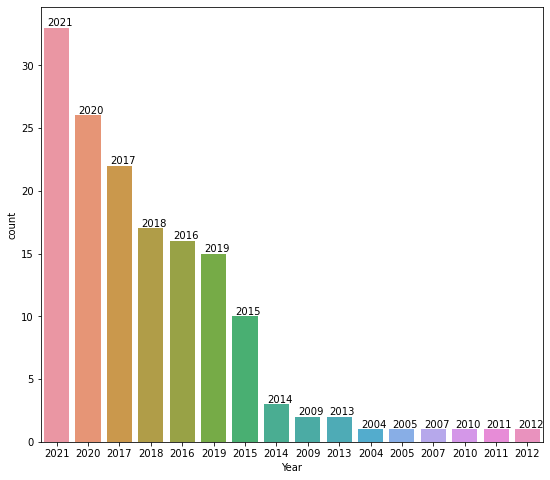

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.countplot(Drama["Year"], 
                   order = Drama["Year"].value_counts().index)

for p, label in zip(ax.patches, Drama["Year"].value_counts().index):
    ax.annotate(label, (p.get_x()+0.1, p.get_height()+0.15))

Recommended Top 5 Kdrama Based on :

1. General

In [ ]:
Drama.sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
53,Reply 1988,9.1,12.300,2015,20
151,Snowdrop,9.0,2.738,2021,16
88,Mr.queen,8.9,12.580,2020,20
102,Mr. Sunshine,8.8,12.950,2018,24
142,Red sleeve cuff,8.8,11.000,2021,17


2. Year

In [ ]:
year = int(input('Enter Year:'))
Drama[Drama['Year'] == year].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter Year:2020


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
88,Mr.queen,8.9,12.58,2020,20
14,It’s okay to not be okay,8.8,5.42,2020,16
34,Flower of Evil,8.8,3.92,2020,16
83,Hospital Playlist,8.7,10.90,2020,12
82,Handmade Love,8.5,7.70,2020,8


3. Genre

In [ ]:
genre = input("Enter your Genre:")
Drama[Drama[genre] == 1].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter your Genre:Drama


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
151,Snowdrop,9.0,2.738,2021,16
102,Mr. Sunshine,8.8,12.950,2018,24
142,Red sleeve cuff,8.8,11.000,2021,17
14,It’s okay to not be okay,8.8,5.420,2020,16
147,Beyond evil,8.8,4.710,2021,16


4.Number of Episodes

In [ ]:
epi = int(input("Enter your atmost number of episodes:"))
Drama[Drama['No of Episodes'] <= epi].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter your atmost number of episodes:16


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
151,Snowdrop,9.0,2.738,2021,16
14,It’s okay to not be okay,8.8,5.420,2020,16
147,Beyond evil,8.8,4.710,2021,16
52,Youth of May,8.8,4.300,2021,12
34,Flower of Evil,8.8,3.920,2020,16


## Director

In [ ]:
Director = df.copy()
Director = Director.drop(['Actors','Writer','No of Episodes'],axis=1)

In [ ]:
drama_list = []
for c in Drama_List:
    b = Director[Director['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)


In [ ]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [ ]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Director = pd.merge(Director,dramadata,on='Drama Name')
Director = Director.drop(['Genre'],axis=1)

Enter the Director name:Lee Jung-sub
Healer
Angel’s last mission: Love
Dali and cocky prince

Genres that Director has worked with:
{'Comedy', 'Romance', 'Fantasy', 'Thriller', 'Action'}


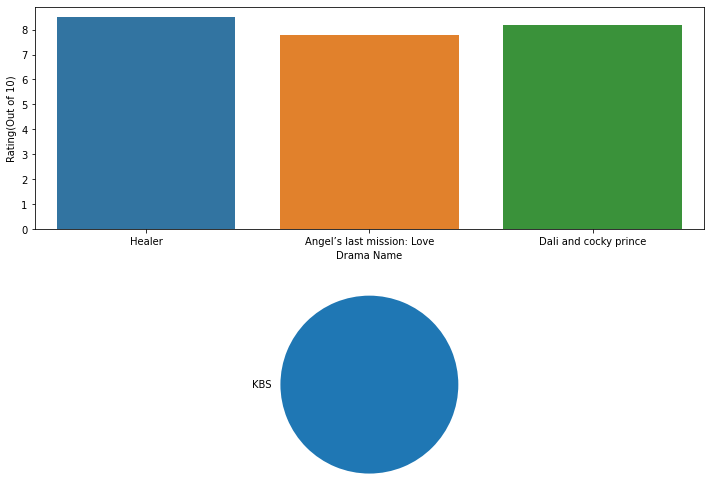

In [ ]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Director name:")
for i in range(Director.shape[0]):
    if user in Director['Director'][i]:
        print(Director['Drama Name'][i])
        index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Director has worked with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

##### Top 5 Directors

In [ ]:
index_ = []
dir_ = []
for i in range(Director.shape[0]):
    for j in Directors_list:
        if j in Director['Director'][i]:
            dir_.append(j)
            index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
result['Director Name'] = dir_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Director','Year','Network'],axis=1)
result.groupby('Director Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Director Name,,
Park Joon-hwa,39.3,20.196
Yoo Je-won,38.8,18.948
Lee Eung-bok,33.2,60.640
Oh Choong-hwan,32.4,37.877
Park Shin-woo,31.5,24.870


## Writer

In [ ]:
Writer = df.copy()
Writer = Writer.drop(['Actors','Director','No of Episodes'],axis=1)

In [ ]:
drama_list = []
for c in Drama_List:
    b = Writer[Writer['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)


In [ ]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [ ]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Writer = pd.merge(Writer,dramadata,on='Drama Name')
Writer = Writer.drop(['Genre'],axis=1)

Enter the Writer name:Song Jae-jung
W:Two Worlds Apart
Memories of Alhambra

Genres that Writer has wrote with:
{'Comedy', 'Romance', 'Fantasy', 'Thriller', 'Action'}


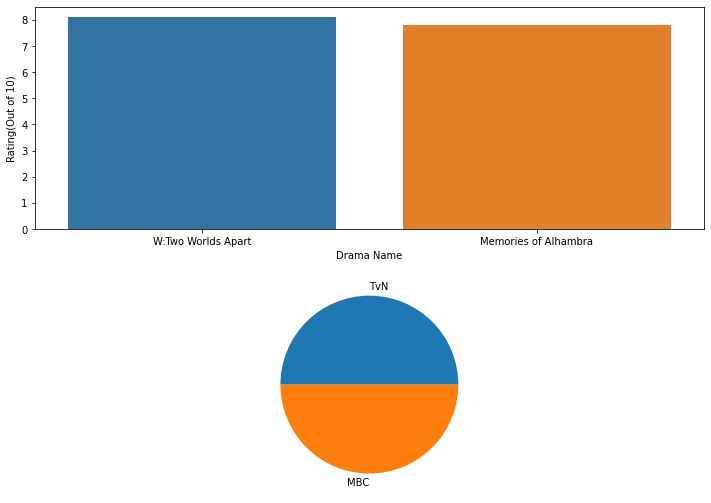

In [ ]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Writer name:")
for i in range(Writer.shape[0]):
    if user in Writer['Writer'][i]:
        print(Writer['Drama Name'][i])
        index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Writer has wrote with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

##### TOP 5 Writers

In [ ]:
index_ = []
wri_ = []
for i in range(Writer.shape[0]):
    for j in Writers_list:
        if j in Writer['Writer'][i]:
            wri_.append(j)
            index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
result['Writer Name'] = wri_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Writer','Year','Network'],axis=1)
result.groupby('Writer Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Writer Name,,
Hong Jung-eun,45.5,55.577
Hong Mi-ran,45.5,55.577
Kim Eun-sook,41.5,76.660
Park Ji-eun,25.0,57.850
Park Hye-ryun,24.6,23.320


In [ ]:
#More updates to be done in future XD